In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# !pip install indic-nlp-library

In [34]:
import pandas as pd
import re
import random
from indicnlp.tokenize import indic_tokenize

file_name = '/content/drive/MyDrive/Datasets_HateSpeech/Marathi/Marathi_2Class.csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name, encoding='utf-8')
df.head()

,Post,Labels Set,Dataset
0,@GajuNaik20 @NitinRaut_INC अबे झाटु लालबहादूर ...,HOF,hate_bin_test
1,@khadaksingh_ अंड नसलेल्या भक्तांना मोदी फायद्...,HOF,hate_bin_test
2,@BhatkhalkarA अरे माठ्या त्यांच्याकडून काहीच श...,HOF,hate_bin_test
3,हे हिंदूंचे सरकार नव्हे तर लांड्यांचे सरकार ! ...,HOF,hate_bin_test
4,@_prashantkadam कदम रडू नको तुझा मालक कोर्टात ...,HOF,hate_bin_test


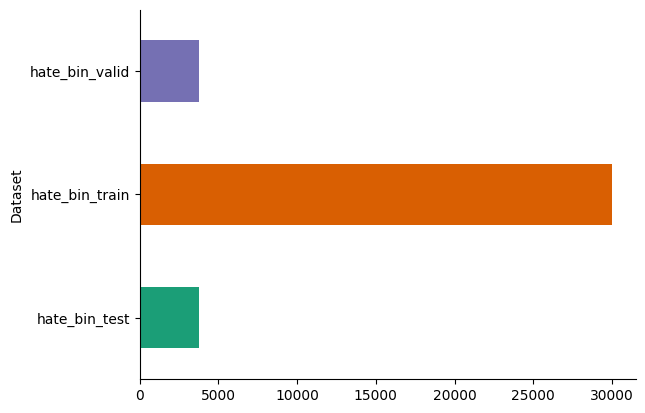

In [35]:
# @title Dataset

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Dataset').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

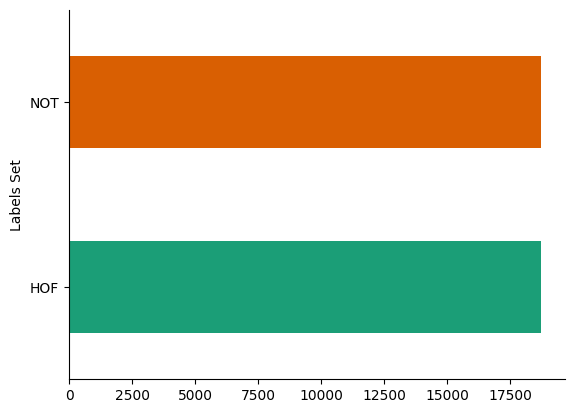

In [36]:
# @title Labels Set

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Labels Set').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [37]:
# # Remove rows with 'FAKE' label
# df = df[df['Labels Set'] != 'fake']

# #Print length of the dataset
# print("Length of the dataset: ", len(df))

In [38]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)

# Check for NaN values
nan_rows = df[df.isna().any(axis=1)]
if not nan_rows.empty:
    print("Rows with NaN values found. Removing...")
    df.dropna(inplace=True)

# Print length of the dataset after removing duplicates and NaN values
print("Length of the dataset after cleaning: ", len(df))

Duplicate rows found. Removing duplicates...
Rows with NaN values found. Removing...
Length of the dataset after cleaning:  37392


In [39]:
df.head()

,Post,Labels Set,Dataset
0,@GajuNaik20 @NitinRaut_INC अबे झाटु लालबहादूर ...,HOF,hate_bin_test
1,@khadaksingh_ अंड नसलेल्या भक्तांना मोदी फायद्...,HOF,hate_bin_test
2,@BhatkhalkarA अरे माठ्या त्यांच्याकडून काहीच श...,HOF,hate_bin_test
3,हे हिंदूंचे सरकार नव्हे तर लांड्यांचे सरकार ! ...,HOF,hate_bin_test
4,@_prashantkadam कदम रडू नको तुझा मालक कोर्टात ...,HOF,hate_bin_test


In [40]:
# import re

# def remove_emojis(text):
#     # Define a regular expression pattern to match emojis
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                                u"\U00002500-\U00002BEF"  # chinese char
#                                u"\U00002702-\U000027B0"
#                                u"\U00002702-\U000027B0"
#                                u"\U000024C2-\U0001F251"
#                                u"\U0001f926-\U0001f937"
#                                u"\U00010000-\U0010ffff"
#                                u"\u2640-\u2642"
#                                u"\u2600-\u2B55"
#                                u"\u200d"
#                                u"\u23cf"
#                                u"\u23e9"
#                                u"\u231a"
#                                u"\ufe0f"  # dingbats
#                                u"\u3030"
#                                "]+", flags=re.UNICODE)

#     # Remove emojis from the text using the pattern
#     return emoji_pattern.sub(r'', text)

In [41]:
# Function to preprocess text
def preprocess_text(text):
    # Remove mentions, email addresses, URLs, RT (retweet)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '', text)  # Remove email addresses
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'RT\s*@\S+', '', text)  # Remove retweets
    # Remove HTML tags (if any)
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation marks (comma and purnviram)
    text = re.sub(r'[\u002C\u0964]', '', text)
    # Remove special characters and accented characters
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Strip leading/trailing whitespaces
    text = text.strip()
    return text

In [42]:
preprocess_text("@BhatkhalkarA अरे माठ्या त्यांच्याकडून काहीच शिकला नाहीस तु, भावपुर्ण श्रद्धांजली आबा")

'अरे माठ्या त्यांच्याकडून काहीच शिकला नाहीस तु भावपुर्ण श्रद्धांजली आबा'

In [43]:
# Preprocess the 'Post' column
df['Processed_Post'] = df['Post'].apply(preprocess_text)
#df['Processed_Post'] = df['Post'].apply(remove_emojis)

df.head(10)

,Post,Labels Set,Dataset,Processed_Post
0,@GajuNaik20 @NitinRaut_INC अबे झाटु लालबहादूर ...,HOF,hate_bin_test,अबे झाटु लालबहादूर यांना कोणी मारले इंदिरा गां...
1,@khadaksingh_ अंड नसलेल्या भक्तांना मोदी फायद्...,HOF,hate_bin_test,अंड नसलेल्या भक्तांना मोदी फायद्यात असणाऱ्या न...
2,@BhatkhalkarA अरे माठ्या त्यांच्याकडून काहीच श...,HOF,hate_bin_test,अरे माठ्या त्यांच्याकडून काहीच शिकला नाहीस तु ...
3,हे हिंदूंचे सरकार नव्हे तर लांड्यांचे सरकार ! ...,HOF,hate_bin_test,हे हिंदूंचे सरकार नव्हे तर लांड्यांचे सरकार या...
4,@_prashantkadam कदम रडू नको तुझा मालक कोर्टात ...,HOF,hate_bin_test,कदम रडू नको तुझा मालक कोर्टात नेहमीच तोंडा वर ...
5,@mukesh__96 सोड रे बुल्ल्या दारू सोड. लवड्या स...,HOF,hate_bin_test,सोड रे बुल्ल्या दारू सोड लवड्या सुट्टीच्या दिव...
6,@RPBaranwal1 @The_naaz तुझी आई घाल आईघाल्या,HOF,hate_bin_test,तुझी आई घाल आईघाल्या
7,@SWARAJY21846977 @NileshD87972393 @PravinGahin...,HOF,hate_bin_test,बुरखाधारीबाईल्या बरोबर करतो नाही मला रोज बकरा ...
8,"@rajuparulekar अरे राईस बॅग कन्व्हर्ट चिदंबरम,...",HOF,hate_bin_test,अरे राईस बॅग कन्व्हर्ट चिदंबरम मिडियाच्या केस ...
9,@BhatkhalkarA अय्यो एप्रिल महिण्यात किती दिवस ...,HOF,hate_bin_test,अय्यो एप्रिल महिण्यात किती दिवस असतात हे आधी ब...


## Code to save the files

In [48]:
set(df["Labels Set"])

{0, 1}

In [52]:
train_df["Labels Set"]

3751     1
3752     1
3753     1
3754     1
3755     1
        ..
33746    0
33747    0
33748    0
33749    0
33750    0
Name: Labels Set, Length: 29896, dtype: int64

In [46]:
mapping_dict = {'HOF': 1, 'NOT': 0}
df["Labels Set"] = df["Labels Set"].map(mapping_dict)

In [56]:
train_df_ = df[df["Dataset"] == 'hate_bin_train'].copy()
test_df_ = df[df["Dataset"] == 'hate_bin_test'].copy()

train_hate_df = train_df_[train_df_["Labels Set"] == 0].copy()
train_non_hate_df = train_df_[train_df_["Labels Set"] == 1].copy()

test_hate_df = test_df_[test_df_['Labels Set'] == 0].copy()
test_non_hate_df = test_df_[test_df_['Labels Set'] == 1].copy()

train_sampled_hate_df = train_hate_df.sample(n=2000, random_state=42)
train_sampled_non_hate_df = train_non_hate_df.sample(n=2000, random_state=42)

test_sampled_hate_df = test_hate_df.sample(n=500, random_state=42)
test_sampled_non_hate_df = test_non_hate_df.sample(n=500, random_state=42)

train_concatenated_df = pd.concat([train_sampled_hate_df, train_sampled_non_hate_df], axis=0)
train_df = train_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

test_concatenated_df = pd.concat([test_sampled_hate_df, test_sampled_non_hate_df], axis=0)
test_df = test_concatenated_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [59]:
train_df[train_df['Labels Set'] == 1]

,Post,Labels Set,Dataset,Processed_Post
1,आज@Dev_Fadnavis ला कोर्टात हजर राहाव लागल. .त्...,1,hate_bin_train,आज ला कोर्टात हजर राहाव लागल त्याची अगदी पेठेत...
3,@MLARajanSalvi @rautsanjay61 चुतीया... हा शब्द...,1,hate_bin_train,चुतीया हा शब्द शिवसैनिकांसाठी सुसंस्कृत आहे वाटत
4,अबे चुतीया एव्हडा मराठी द्वेष का?? तुमच्या घरी...,1,hate_bin_train,अबे चुतीया एव्हडा मराठी द्वेष का तुमच्या घरी क...
10,@ShrimantManey काय करायचं असल्या खुळचट लोकांचं...,1,hate_bin_train,काय करायचं असल्या खुळचट लोकांचं जे स्वतः च्या ...
11,@Shaikh_Mohsin12 @TV9Marathi मूर्ख आहेत हे मीड...,1,hate_bin_train,मूर्ख आहेत हे मीडिया वाले
...,...,...,...,...
3990,@Sr_vedant @ks198926 @vaibhav07_spks @JevMahar...,1,hate_bin_train,पोंगया मंग मी काय सांगतो आहे
3992,पत्रकारितेचा स्तर किती उच्च दर्जाचा होता हे आज...,1,hate_bin_train,पत्रकारितेचा स्तर किती उच्च दर्जाचा होता हे आज...
3993,@Baburao32251793 झवायला दे ना स्वाती,1,hate_bin_train,झवायला दे ना स्वाती
3998,@MChormal @khadaksingh_ त्या छिनाल राऊत च्या ग...,1,hate_bin_train,त्या छिनाल राऊत च्या गांडीत दम आहे का तेवढाबां...


In [60]:
# Define the new filename for saving the preprocessed data
train_file = file_name.split('.')[0] + '_train.csv'

# Save the preprocessed data to a new CSV file
train_df.to_csv(train_file, index=False, encoding='utf-8')

In [61]:
# Define the new filename for saving the preprocessed data
test_file = file_name.split('.')[0] + '_test.csv'

# Save the preprocessed data to a new CSV file
test_df.to_csv(test_file, index=False, encoding='utf-8')